# DTSC670: Foundations of Machine Learning Models
## Module 4
## Assignment 7: Polynomial Regression I

#### Name: Trenton Middleton

The purpose of this assignment is expose you to a polynomial regression problem. Your goal is to:

1. Create the following figure using matplotlib, which plots the data from the file called `PolynomialRegressionData_I.csv`.  This figure is generated using the same code that you developed in Assignment 3 of Module 2 - you should reuse that same code.
2. Perform a PolynomialFeatures transformation, then perform linear regression to calculate the optimal ordinary least squares regression model parameters.
3. Recreate the first figure by adding the best fit curve to all subplots.
4. Infer the true model parameters.

Below is the first figure you must emulate:

<img src="PolynomialDataPlot_I.png" width ="800" />

Below is the second figure you must emulate:

<img src="PolynomialDataPlot_II.png" width ="800" />

Each of the two figures has four subplots.  Note the various viewing angles that each subplot presents - you can achieve this with the [view_init()](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) method. Use the same color scheme for the datapoints shown here, which is called `jet`.  Be sure to label your axes as shown.

In [1]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
import os
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Import Data

Begin by importing the data from the file called `PolynomialRegressionData_I.csv`.

In [2]:
import pandas as pd

fileName = "PolynomialRegressionData_I.csv"
import_df = pd.read_csv(fileName)
import_df

,x,y,z
0,-3.319120,-2.070820,-960.075064
1,8.812980,8.055306,109.527857
2,-19.995425,-19.407131,4867.408412
3,-7.906697,-7.559838,-149.039706
4,-14.129764,-12.762732,1493.048153
...,...,...,...
70,16.136077,14.321014,2411.074946
71,-14.501012,-13.816762,1938.853959
72,-14.428946,-14.396914,2201.489750
73,12.295652,12.491922,1595.894422


# Create First Image 

Use the [scatter3D](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) to plot in three dimensions.  Create four [subplots](https://matplotlib.org/3.1.0/gallery/recipes/create_subplots.html) with the appropriate viewing angles using the [view_init()](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) function.

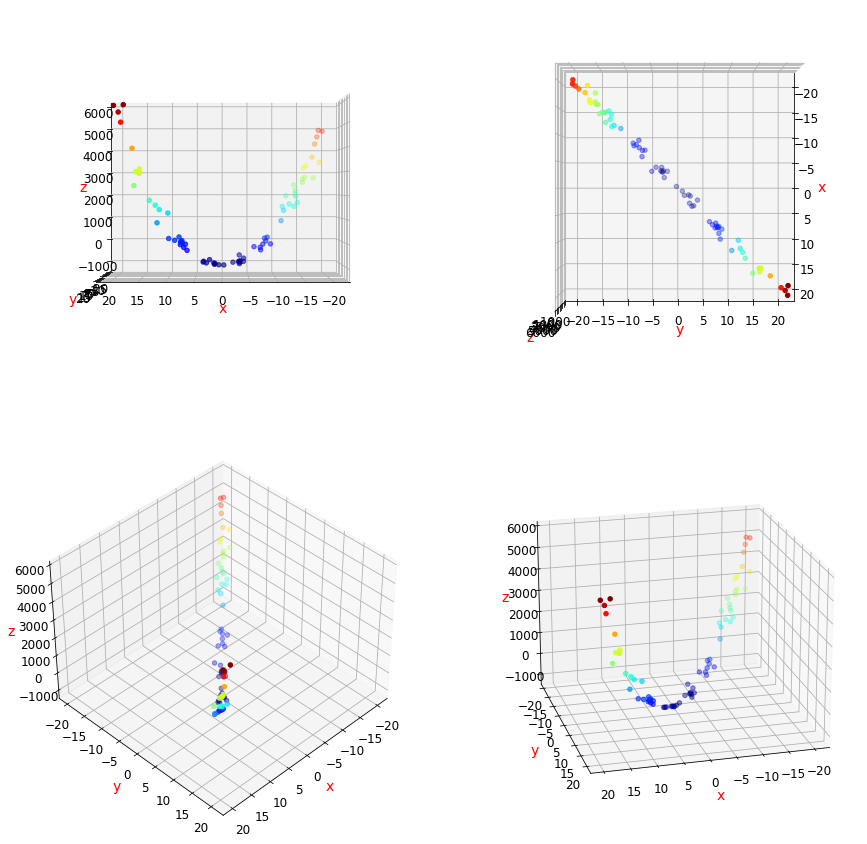

In [3]:
#%matplotlib tk

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=[15,15])

#main information for all 4 subplots.
#setting the values from the dataframe above for use of the 4 subplots.  Color set to jet and oppropriate angles set via view_init
x = import_df['x'].values
y = import_df['y'].values
z = import_df['z'].values

#Creation of subplot #1
ax1 = fig.add_subplot (2,2,1, projection = '3d')
ax1.set_xlabel('x', c= 'r')
ax1.set_ylabel('y', c ='r')
ax1.set_zlabel('z', c= 'r')
ax1.view_init(0,90)
ax1.scatter3D(x, y, z, c= z, cmap='jet', marker='o')


#Creation of subplot #2
ax2 = fig.add_subplot (2,2,2, projection = '3d')
ax2.set_xlabel('x', c= 'r')
ax2.set_ylabel('y', c ='r')
ax2.set_zlabel('z', c= 'r')
ax2.view_init(90,0)
ax2.scatter3D(x, y, z, c= z, cmap='jet', marker='o')


#Creation of subplot #3
ax3 = fig.add_subplot (2,2,3, projection = '3d')
ax3.set_xlabel('x', c= 'r')
ax3.set_ylabel('y', c ='r')
ax3.set_zlabel('z', c= 'r')
ax3.view_init(40,45)
ax3.scatter3D(x, y, z, c= z, cmap='jet', marker='o')


#Creation of subplot #4
ax4 = fig.add_subplot (2,2,4, projection = '3d')
ax4.set_xlabel('x', c= 'r')
ax4.set_ylabel('y', c ='r')
ax4.set_zlabel('z', c= 'r')
ax4.view_init(20,75)
ax4.scatter3D(x, y, z, c= z, cmap='jet', marker='o')

# Perform Polynomial Features Transformation

Perform a polynomial transformation on your features.

In [4]:
from sklearn.preprocessing import PolynomialFeatures
# Convert colum X from a dataframe into mumpy array for Poly Features
X = import_df [['x', 'y']]

# Perform Polynomial Features Transformation
poly_features = PolynomialFeatures (degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
print(X_poly)

[[-3.31911981e+00 -2.07082002e+00  1.10165563e+01  6.87329977e+00
   4.28829557e+00]
 [ 8.81297974e+00  8.05530560e+00  7.76686119e+01  7.09912450e+01
   6.48879482e+01]
 [-1.99954250e+01 -1.94071308e+01  3.99817021e+02  3.88053829e+02
   3.76636728e+02]
 [-7.90669709e+00 -7.55983776e+00  6.25158589e+01  5.97733473e+01
   5.71511470e+01]
 [-1.41297644e+01 -1.27627317e+01  1.99650241e+02  1.80334391e+02
   1.62887320e+02]
 [-1.63064562e+01 -1.56327401e+01  2.65900514e+02  2.54914592e+02
   2.44382564e+02]
 [-1.25495915e+01 -1.38411542e+01  1.57492248e+02  1.73700832e+02
   1.91577551e+02]
 [-6.17757092e+00 -7.02581483e+00  3.81623825e+01  4.34024694e+01
   4.93620741e+01]
 [-4.12930103e+00 -4.29590060e+00  1.70511270e+01  1.77390668e+01
   1.84547620e+01]
 [ 1.55266936e+00  2.46986538e+00  2.41078214e+00  3.83488430e+00
   6.10023500e+00]
 [-3.23221942e+00 -3.15196884e+00  1.04472424e+01  1.01878549e+01
   9.93490754e+00]
 [ 7.40878002e+00  7.63701879e+00  5.48900213e+01  5.65809922e+01

# Train Linear Regression Model

From the `sklearn.linear_model` library, import the `LinearRegression` class.  Instantiate an object of this class called `model`, and fit it to the data. `x` and `y` will be your training data and `z` will be your response. Print the optimal model parameters to the screen by completing the following `print()` statements.

In [5]:
# Import Linear Regression class
from sklearn.linear_model import LinearRegression

training_data = import_df

# Create 'response' from just the z column in orginal dataframe
response = training_data['z']
response = pd.DataFrame(response)

# Drop the z column from 'training_data' column to now just have X and Y
training_data = training_data.drop (['z'], axis = 1)

from sklearn.linear_model import LinearRegression
# Create "model" perform linear regression model fitting
model = LinearRegression()
model = model.fit(X_poly, response)



In [6]:
print("Computed Model Coefficients: ", model.coef_)
print("Computed Model Intercept : ", model.intercept_)

Computed Model Coefficients:  [[ 8.09457649 -0.09962593 -0.05144212  0.10558512 15.94863437]]
Computed Model Intercept :  [-1000.13811493]


# Create Second Image

Use the following `x_fit` and `y_fit` data to compute `z_fit` by invoking the model's `predict()` method.  This will allow you to plot the line of best fit that is predicted by the model.

In [7]:
# Plot Curve Fit
x_fit = np.linspace(-21,21,1000)
y_fit = x_fit

# Create a dataframe from the above X_fit, then rename the column name to x_fit and add y_fit 
# to the dataframe to prepare to make the prediction of z_fit 
features= pd.DataFrame({'x_fit': x_fit, 'y_fit':y_fit})

# Make the z_fit prediction.  1st pull the X column fro mteh new dataframe an make an array then Perform Polynomial Features Transformation
X = features [['x_fit', 'y_fit']]
# then Perform Polynomial Features Transformation
X_new_poly = poly_features.fit_transform(X)

# make model prediction based on trained linear regression model 
model = model.predict(X_new_poly)

# Convert predictions (z_fit) into a dataframe
z_fit= pd.DataFrame(model)
z_fit = z_fit.rename(columns = {0:'z_fit'})

# add z_fit to features dataframe
features['z_fit'] = z_fit
features

,x_fit,y_fit,z_fit
0,-21.000000,-21.000000,5889.192745
1,-20.957958,-20.957958,5861.299998
2,-20.915916,-20.915916,5833.463822
3,-20.873874,-20.873874,5805.684217
4,-20.831832,-20.831832,5777.961183
...,...,...,...
995,20.831832,20.831832,6111.060114
996,20.873874,20.873874,6139.455396
997,20.915916,20.915916,6167.907249
998,20.957958,20.957958,6196.415674


Recreate the first image, but plot the line of best fit in each of the subplots as well.

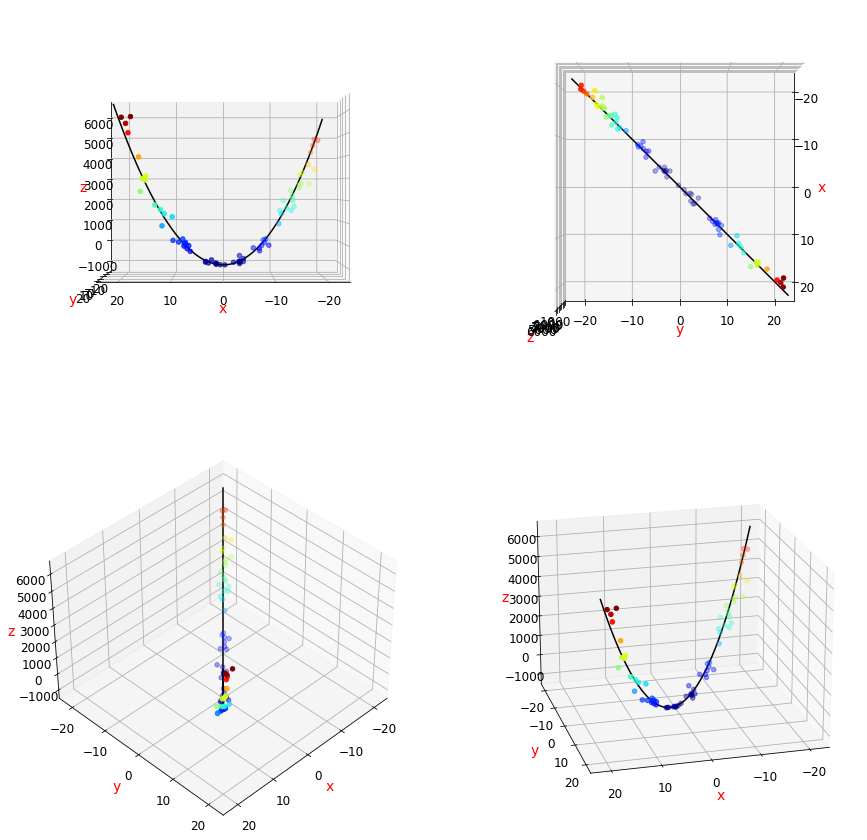

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=[15,15])

#2nd image subplots.  These include x, y and z from orginal data (jet color) and x_fit, y_fit and z_fit (black line)
#setting the values from the dataframe above for use of the 4 subplots
x2 = features['x_fit'].values
y2 = features['y_fit'].values
z2 = features['z_fit'].values

#Creation of subplot #1, 2nd image
ax1 = fig.add_subplot (2,2,1, projection = '3d')
ax1.set_xlabel('x', c= 'r')
ax1.set_ylabel('y', c ='r')
ax1.set_zlabel('z', c= 'r')
ax1.view_init(0,90)
ax1.plot3D(x2, y2, z2, c= 'k')
ax1.scatter3D(x, y, z, c= z, cmap='jet', marker='o')

#Creation of subplot #2, 2nd image
ax2 = fig.add_subplot (2,2,2, projection = '3d')
ax2.set_xlabel('x', c= 'r')
ax2.set_ylabel('y', c ='r')
ax2.set_zlabel('z', c= 'r')
ax2.view_init(90,0)
ax2.plot3D(x2, y2, z2, c= 'k')
ax2.scatter3D(x, y, z, c= z, cmap='jet', marker='o')


#Creation of subplot #3, 2nd image
ax3 = fig.add_subplot (2,2,3, projection = '3d')
ax3.set_xlabel('x', c= 'r')
ax3.set_ylabel('y', c ='r')
ax3.set_zlabel('z', c= 'r')
ax3.view_init(40,45)
ax3.plot3D(x2, y2, z2, c= 'k')
ax3.scatter3D(x, y, z, c= z, cmap='jet', marker='o')


#Creation of subplot #4, 2nd image
ax4 = fig.add_subplot (2,2,4, projection = '3d')
ax4.set_xlabel('x', c= 'r')
ax4.set_ylabel('y', c ='r')
ax4.set_zlabel('z', c= 'r')
ax4.view_init(20,75)
ax4.plot3D(x2, y2, z2, c= 'k')
ax4.scatter3D(x, y, z, c= z, cmap='jet', marker='o')

# Infer the True Model Parameters

Provided that the true model parameters are **integer values**, infer the true model parameters based on the optimal model parameter values that you calculated above.  You may "hard-code" these values into the below print statements. (See the assignment 3 template for more information)

Use the `get_feature_names()` method of the `PolynomialFeatures` class to be certain of which coefficients you calculated!  You need to report your final answers in a format that is ___abundantly clear___ to me which which coefficient corresponds to which dependent variable of the model!  You may add more `print()` statements to accomplish this if you must.

In [11]:
# Coefficients from above and feature names below.  Dropped all of the zero value coefficients
print("True Model Coefficients: x = 8 , y = 0, x^2 = 0, x y = 0, y^2 = 16")
print("True Model Intercept : -1000")

True Model Coefficients: x = 8 , y = 0, x^2 = 0, x y = 0, y^2 = 16
True Model Intercept : -1000


In [10]:
# code for the get_feature_names
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np

X = import_df [['x', 'y']]

p = PolynomialFeatures(degree=2, include_bias = False).fit(X)
p.get_feature_names(X.columns)

['x', 'y', 'x^2', 'x y', 'y^2']